This notebook focuses on the initial Data Exploration.
- looking at outliers (but not doing anything with them)
- looking for duplicates
- looking for NaN values

In [1]:
import numpy as np
import matplotlib.pyplot as plt #for displaying plots
import pandas as pd
import seaborn as sns
import tensorflow as tf
import datetime
import random
import os
from pathlib import Path

In [2]:
# setting a seed to ensure reproducability and consistency
random.seed(16)
np.random.seed(16)
tf.random.set_seed(16)

In [3]:
plt.rcParams.update({'font.size': 14})

# Uploading the Data

#### Data Set Information:

Bicycle data in Karlsruhe, Germany.

#### Attribute Information
- `bike_count`: Number of bikes, which drove by the counting station during the day

- `temperature`: Temperature in °C

- `humidity`: Relative humidity in %

- `windspeed`: Windspeed in m/s, faulty values = -999

- `wind_direction`: Wind direction in °, faulty values = -999

- `precipitation`: Precipitation in mm (hourly sum)

- `precip_ind`: Precipitation indicator
  - 0 = no
  - 1 = yes
  - -999 = faulty

- `precip_type`:
  - 0 = no precipitation (conventional or automatic measurement)
  - 1 = just rain (in historical data before 01.01.1979)
  - 4 = Precipitation form unknown, although precipitation reported; Form of falling and deposited precipitation cannot be clearly determined with automatic measurement
  - 6 = Only rain; liquid precipitation in automatic measurement
  - 7 = Only snow; solid precipitation in automatic measurement
  - 8 = Rain and snow and/or sleet; liquid and solid precipitation in automatic measurement
  - 9 = Misidentification; missing value or precipitation form not determinable with automatic measurement
  - -999 = Faulty value

- `sun`: Hourly sunshine duration in minutes, Faulty value = -999 (Hourly sum)

- `visibility`: Visibility in 

Notiz: precip type und precip indicator wurden mit dem median auf den tag angepasstmeters, Faulty values = -999
V.Sichtweite: Sichtwe eprüft, gepflegt, nicht korrigiert;

In [4]:
# Change Working Directory
os.chdir("..")
print(os.getcwd()) # print current working directory

c:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Probabilistic-Forecasting-of-Bicycle-Counts-in-Karlsruhe-with-Neural-Networks


In [5]:
df = pd.read_csv(r"original_data\2012-04-25_2024-01-25_KA_bike_weather.csv")

In [6]:
df_schoolholiday = pd.read_csv(r"original_data\schulferien_BW_2012_2024.csv")

In [7]:
#save a copy of the raw data
df_raw = df.copy()

In [8]:
# change date column to datetime
df['date'] = pd.to_datetime(df['date'])

df.head()

,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type
0,2012-04-25,4593.0,12.038889,65.611111,3.033333,183.333333,53611.111111,0.0,294,12.0,0.0,0.0
1,2012-04-26,5849.0,14.194444,66.111111,2.844444,249.444444,52555.555556,0.0,176,10.0,0.0,0.0
2,2012-04-27,5846.0,15.233333,68.666667,1.505556,235.000000,45055.555556,0.1,373,5.0,0.0,0.0
3,2012-04-28,4261.0,22.200000,53.444444,2.700000,153.888889,41500.000000,0.0,678,8.0,0.0,0.0
4,2012-04-29,1901.0,17.994444,62.222222,3.950000,214.444444,52777.777778,3.7,319,16.0,0.0,0.0


In [9]:
df.tail()

,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type
4286,2024-01-21,994.0,-1.500000,87.666667,1.587500,187.500000,14942.500000,0.0,191,7.7,0.0,0.0
4287,2024-01-22,3398.0,7.479167,76.791667,7.075000,223.750000,47245.416667,5.4,0,18.0,1.0,6.0
4288,2024-01-23,4427.0,8.358333,74.541667,7.250000,231.250000,38257.916667,0.5,164,16.6,0.5,3.0
4289,2024-01-24,4124.0,11.945833,72.291667,8.350000,234.583333,45765.833333,1.9,7,18.8,0.0,0.0
4290,2024-01-25,4594.0,9.366667,85.083333,3.345833,229.583333,23374.583333,1.0,220,7.5,0.0,0.0


In [10]:
df_schoolholiday.head()

,start,end,year,stateCode,name
0,2012-10-29,2012-11-02,2012,BW,herbstferien
1,2012-12-24,2013-01-05,2012,BW,weihnachtsferien
2,2013-03-25,2013-04-05,2013,BW,osterferien
3,2013-05-21,2013-06-01,2013,BW,pfingstferien
4,2013-07-25,2013-09-07,2013,BW,sommerferien


In [11]:
df_schoolholiday.tail()

,start,end,year,stateCode,name
64,2024-05-21,2024-05-31,2024,BW,pfingstferien
65,2024-07-25,2024-09-07,2024,BW,sommerferien
66,2024-10-28,2024-10-30,2024,BW,herbstferien
67,2024-10-31,2024-10-31,2024,BW,herbstferien
68,2024-12-23,2025-01-04,2024,BW,weihnachtsferien


# Exploring the data

In [12]:
len(df)

4291

In [13]:
df.columns

Index(['date', 'bike_count', 'temperature', 'humidity', 'windspeed',
       'wind_direction', 'visibility', 'precipitation', 'sun', 'windspeed_max',
       'precip_indic', 'precip_type'],
      dtype='object')

In [14]:
df.dtypes

date              datetime64[ns]
bike_count               float64
temperature              float64
humidity                 float64
windspeed                float64
wind_direction           float64
visibility               float64
precipitation            float64
sun                        int64
windspeed_max            float64
precip_indic             float64
precip_type              float64
dtype: object

## Checking for Missing Values

In [15]:
df.isna().sum()

date              0
bike_count        0
temperature       0
humidity          0
windspeed         0
wind_direction    0
visibility        0
precipitation     0
sun               0
windspeed_max     0
precip_indic      0
precip_type       0
dtype: int64

Checking for missing dates...

In [16]:
complete_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')

missing_dates = complete_range[~complete_range.isin(df['date'])]

print("Missing dates:")
print(missing_dates)

Missing dates:
DatetimeIndex(['2018-04-15', '2018-04-16'], dtype='datetime64[ns]', freq='D')


In [17]:
df[df['date'].isin(missing_dates)]

,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type


## Checking for Outliers

In [18]:
df.shape

(4291, 12)

In [19]:
df.describe()

,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type
count,4291,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000
mean,2018-03-10 23:36:10.403169280,4735.174603,12.538591,73.092589,3.475722,176.768780,34281.616807,1.539361,309.323701,9.544232,0.192205,1.162666
min,2012-04-25 00:00:00,273.000000,-7.827778,31.277778,0.600000,16.666667,207.777778,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2015-04-02 12:00:00,3220.000000,6.427778,62.611111,2.144444,129.722222,21317.777778,0.000000,33.000000,7.000000,0.000000,0.000000
50%,2018-03-10 00:00:00,4880.000000,12.450000,74.666667,3.122222,206.666667,35432.222222,0.000000,246.000000,9.000000,0.000000,0.000000
75%,2021-02-16 12:00:00,6208.000000,18.705556,84.111111,4.355556,228.888889,46983.611111,1.000000,548.000000,11.700000,0.000000,0.000000
max,2024-01-25 00:00:00,16149.000000,31.794444,100.000000,12.233333,340.000000,71937.777778,58.300000,909.000000,31.000000,1.000000,8.000000
std,NaN,1981.068801,7.636231,14.120612,1.816690,69.225224,16381.273131,3.911284,280.267835,3.956637,0.384261,2.320596


Maximum bike count of over 16000 doesn't seem right.

In [20]:
max_row_bike = df.loc[df['bike_count'].idxmax()]

In [21]:
max_row_bike.head()

date           2018-06-08 00:00:00
bike_count                 16149.0
temperature              22.727778
humidity                 71.944444
windspeed                 2.055556
Name: 2233, dtype: object

How many rows are there with a bike count over a certain number?

In [22]:
def count_rows_by_condition(df, column, condition, threshold):
    if condition == 'larger':
        filtered_df = df[df[column] > threshold]
    elif condition == 'smaller':
        filtered_df = df[df[column] < threshold]
    elif condition == 'equal':
        filtered_df = df[df[column] == threshold]
    else:
        raise ValueError("Condition must be 'larger', 'smaller', or 'equal'.")
    
    number_of_rows = len(filtered_df)
    
    if condition == 'equal':
        print(f"There are {number_of_rows} entries equal to {threshold}.")
    else:
        print(f"There are {number_of_rows} entries {condition} than {threshold}.")

    return filtered_df

In [23]:
count_rows_by_condition(df, 'bike_count', 'larger', 10000)

There are 11 entries larger than 10000.


,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type
2202,2018-05-08,13109.0,21.122222,41.388889,4.377778,50.000000,28496.111111,0.0,833,10.9,0.0,0.0
2203,2018-05-09,12701.0,20.533333,48.666667,3.055556,82.777778,36868.333333,0.0,714,9.0,0.0,0.0
2222,2018-05-28,10200.0,24.516667,65.333333,3.266667,70.000000,14847.222222,0.0,570,9.8,0.0,0.0
2230,2018-06-05,13292.0,24.144444,58.777778,3.122222,80.000000,24607.222222,0.0,806,10.2,0.0,0.0
2231,2018-06-06,13538.0,23.711111,62.500000,2.422222,185.555556,16275.000000,2.0,678,6.3,0.0,0.0
2232,2018-06-07,13316.0,21.488889,75.388889,2.772222,230.000000,25608.333333,3.3,212,5.9,0.0,0.0
2233,2018-06-08,16149.0,22.727778,71.944444,2.055556,152.222222,15031.111111,2.9,575,9.0,0.0,0.0
2234,2018-06-09,14357.0,22.283333,78.111111,2.688889,238.888889,14092.777778,2.0,480,8.1,0.0,0.0
2238,2018-06-13,15952.0,16.533333,63.388889,4.100000,203.888889,36424.444444,0.0,16,9.3,0.0,0.0
2288,2018-08-02,13450.0,29.683333,49.000000,2.391667,337.500000,33195.000000,0.0,626,7.2,0.0,0.0


In [24]:
count_rows_by_condition(df, 'bike_count', 'larger', 15000)

There are 2 entries larger than 15000.


,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type
2233,2018-06-08,16149.0,22.727778,71.944444,2.055556,152.222222,15031.111111,2.9,575,9.0,0.0,0.0
2238,2018-06-13,15952.0,16.533333,63.388889,4.100000,203.888889,36424.444444,0.0,16,9.3,0.0,0.0


In [25]:
count_rows_by_condition(df, 'bike_count', 'larger', 12000)

There are 10 entries larger than 12000.


,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type
2202,2018-05-08,13109.0,21.122222,41.388889,4.377778,50.000000,28496.111111,0.0,833,10.9,0.0,0.0
2203,2018-05-09,12701.0,20.533333,48.666667,3.055556,82.777778,36868.333333,0.0,714,9.0,0.0,0.0
2230,2018-06-05,13292.0,24.144444,58.777778,3.122222,80.000000,24607.222222,0.0,806,10.2,0.0,0.0
2231,2018-06-06,13538.0,23.711111,62.500000,2.422222,185.555556,16275.000000,2.0,678,6.3,0.0,0.0
2232,2018-06-07,13316.0,21.488889,75.388889,2.772222,230.000000,25608.333333,3.3,212,5.9,0.0,0.0
2233,2018-06-08,16149.0,22.727778,71.944444,2.055556,152.222222,15031.111111,2.9,575,9.0,0.0,0.0
2234,2018-06-09,14357.0,22.283333,78.111111,2.688889,238.888889,14092.777778,2.0,480,8.1,0.0,0.0
2238,2018-06-13,15952.0,16.533333,63.388889,4.100000,203.888889,36424.444444,0.0,16,9.3,0.0,0.0
2288,2018-08-02,13450.0,29.683333,49.000000,2.391667,337.500000,33195.000000,0.0,626,7.2,0.0,0.0
2289,2018-08-03,12502.0,29.677778,49.611111,3.194444,83.333333,24296.111111,0.0,822,12.6,0.0,0.0


Interestingly, all the highest bike counts were measured in 2018.

## Checking for duplicates

In [26]:
duplicates_df = df.duplicated()
print('Number of duplicates: ' + str(duplicates_df.sum()))

Number of duplicates: 0


## Looking at the precip_indic and precip_type columns

In [27]:
def get_value_counts_for_column(df, column_name):
    if column_name in df.columns:
        return df[column_name].value_counts()
    else:
        return f"Column {column_name} does not exist in the DataFrame"

In [28]:
df.precip_indic.nunique()

6

In [29]:
df.precip_indic.unique()

array([0.   , 1.   , 0.5  , 0.875, 0.75 , 0.625])

In [30]:
get_value_counts_for_column(df, 'precip_indic')

precip_indic
0.000    3401
1.000     758
0.500     129
0.875       1
0.750       1
0.625       1
Name: count, dtype: int64

In [31]:
df.precip_type.nunique()

23

In [32]:
df.precip_type.unique()

array([0. , 6. , 3. , 7. , 8. , 6.5, 3.5, 0.4, 0.8, 1.2, 1.6, 2. , 2.4,
       2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 7.5, 5. ])

In [33]:
get_value_counts_for_column(df, 'precip_type')

precip_type
0.0    3389
6.0     693
3.0     132
7.0      36
4.0       8
6.5       6
8.0       5
2.0       4
3.5       3
5.0       2
0.8       1
1.2       1
1.6       1
0.4       1
2.4       1
2.8       1
3.2       1
3.6       1
4.4       1
4.8       1
5.2       1
5.6       1
7.5       1
Name: count, dtype: int64

# Plotting the Data

In [34]:
base_path_plots = Path(r"Figures\(00) Initial Data Exploration")

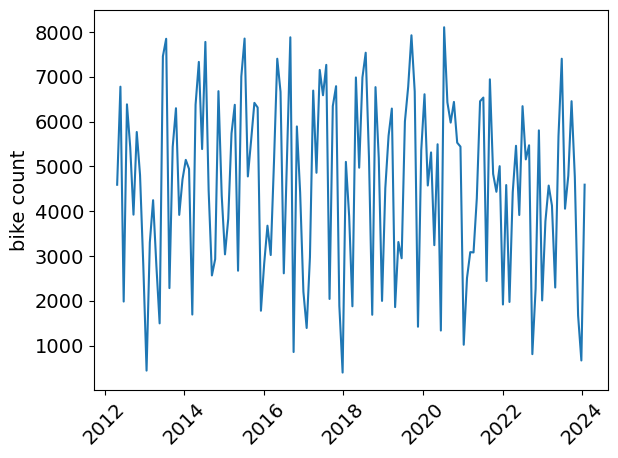

In [35]:
# only take into account every 30th observation
plt.plot(df['date'].iloc[::30], df['bike_count'].iloc[::30])

plt.ylabel('bike count')
plt.xticks(rotation=45)
plt.tight_layout()

In [36]:
tab10 = plt.colormaps.get_cmap('tab10')

In [37]:
color_true = tab10(1)  
color_false = tab10(0)

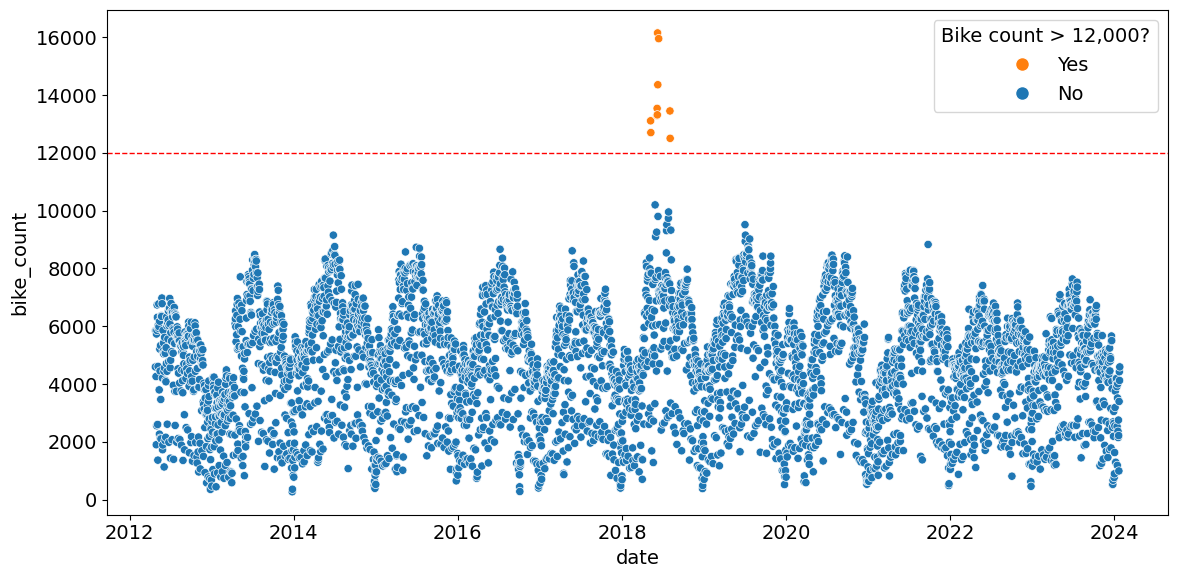

In [38]:
plt.figure(figsize=(12, 6))
plt.axhline(y=12000, color='red', linestyle='--', linewidth=1)

sns.scatterplot(data=df, 
                x='date', 
                y='bike_count', 
                hue=df['bike_count'] > 12000, 
                palette={True: color_true, False: color_false})

plt.legend(title='Bike count > 12,000?', 
           labels=['Yes', 'No'], 
           handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_true, markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_false, markersize=10)])

plt.tight_layout()
plt.gcf().savefig( base_path_plots / "Bike_count_outliers.png")
plt.show()


<Axes: xlabel='temperature', ylabel='bike_count'>

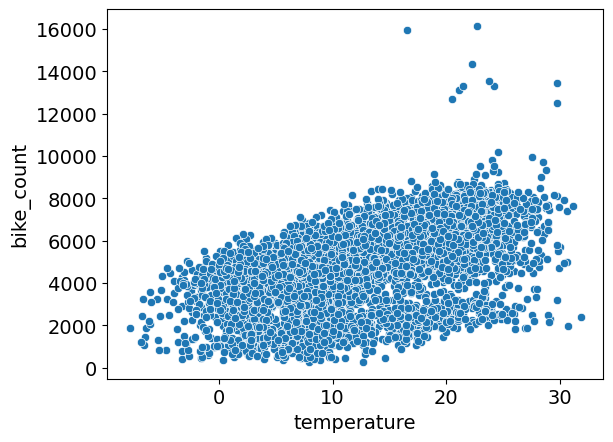

In [39]:
sns.scatterplot(data=df, x='temperature', y='bike_count') 

<Axes: xlabel='humidity', ylabel='bike_count'>

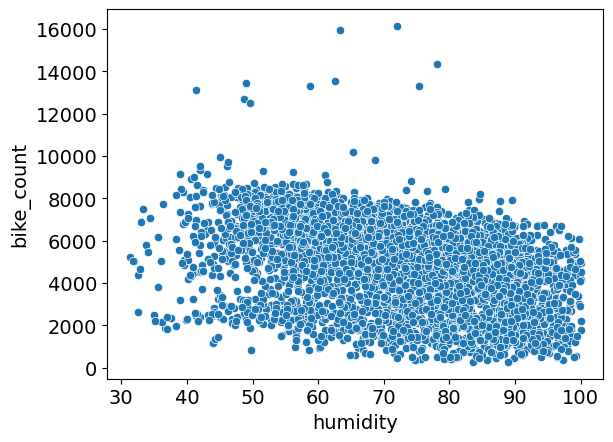

In [40]:
sns.scatterplot(data=df, x='humidity', y='bike_count')

<Axes: xlabel='windspeed', ylabel='bike_count'>

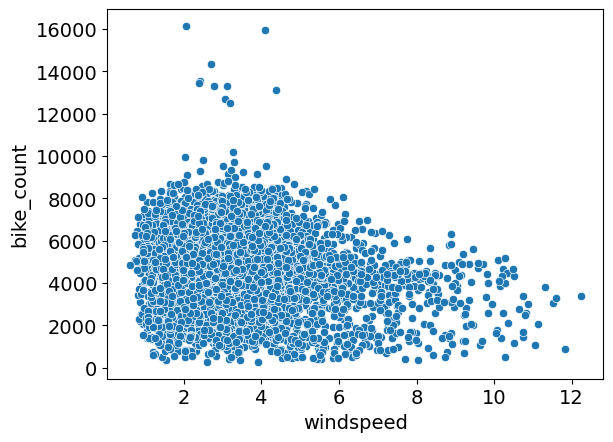

In [41]:
sns.scatterplot(data=df, x='windspeed', y='bike_count') 

<Axes: xlabel='wind_direction', ylabel='bike_count'>

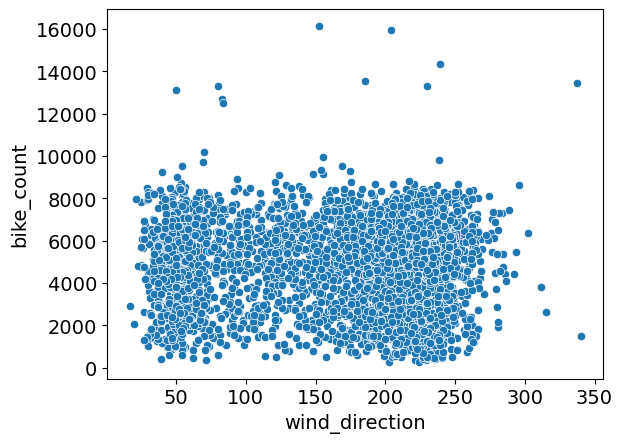

In [42]:
sns.scatterplot(data=df, x='wind_direction', y='bike_count') 

<Axes: xlabel='visibility', ylabel='bike_count'>

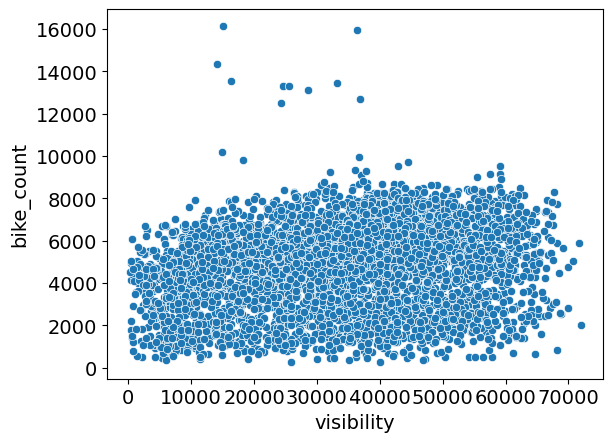

In [43]:
sns.scatterplot(data=df, x='visibility', y='bike_count') 

<Axes: xlabel='precipitation', ylabel='bike_count'>

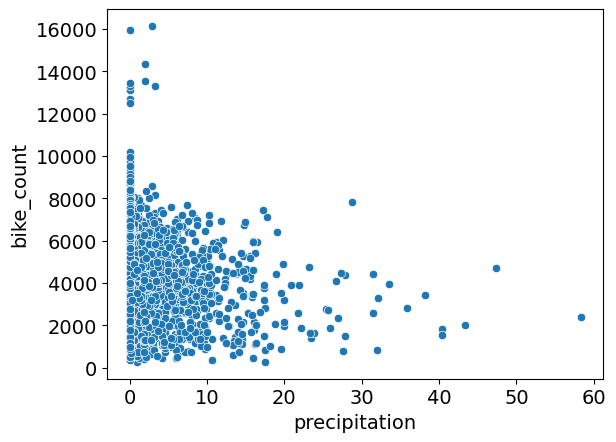

In [44]:
sns.scatterplot(data=df, x='precipitation', y='bike_count') 

<Axes: xlabel='sun', ylabel='bike_count'>

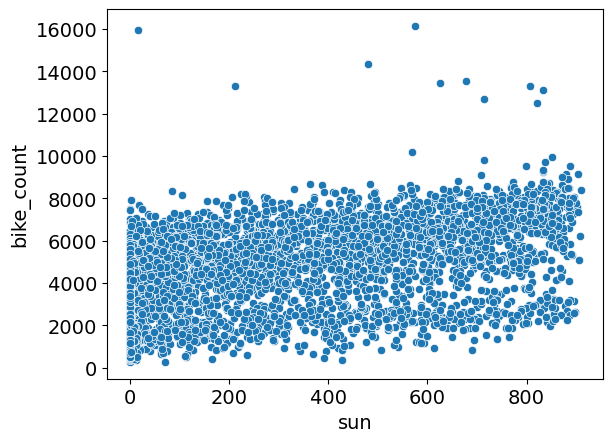

In [45]:
sns.scatterplot(data=df, x='sun', y='bike_count') 

<Axes: xlabel='windspeed_max', ylabel='bike_count'>

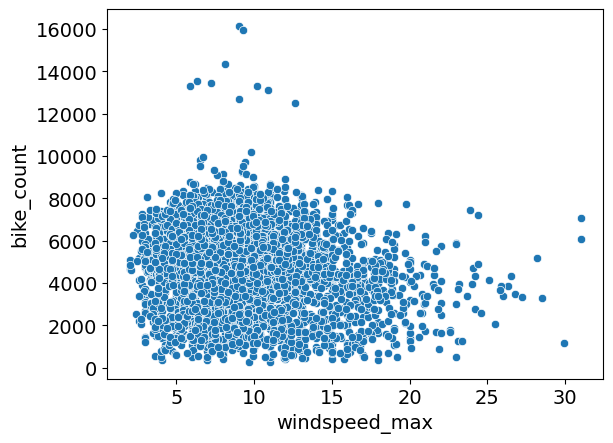

In [46]:
sns.scatterplot(data=df, x='windspeed_max', y='bike_count') 

<Axes: xlabel='precip_indic', ylabel='bike_count'>

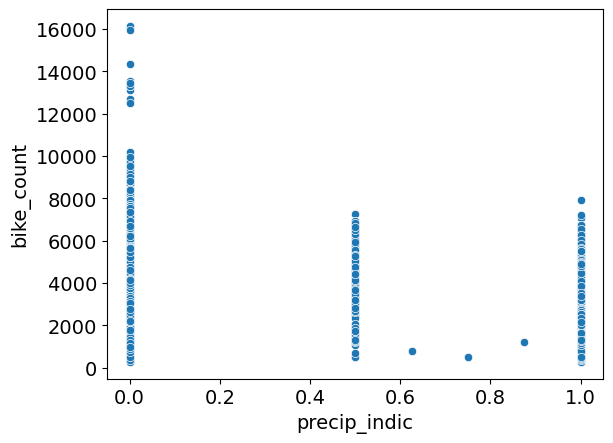

In [47]:
sns.scatterplot(data=df, x='precip_indic', y='bike_count') 

<Axes: xlabel='precip_type', ylabel='bike_count'>

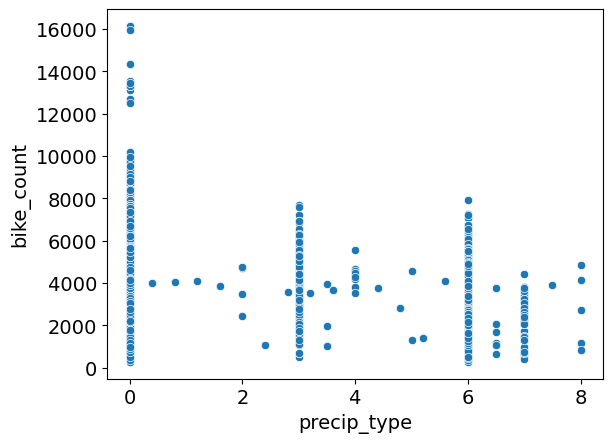

In [48]:
sns.scatterplot(data=df, x='precip_type', y='bike_count') 

C:\Users\aisti\AppData\Local\Temp\ipykernel_59616\339166041.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  weekday_plot.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)


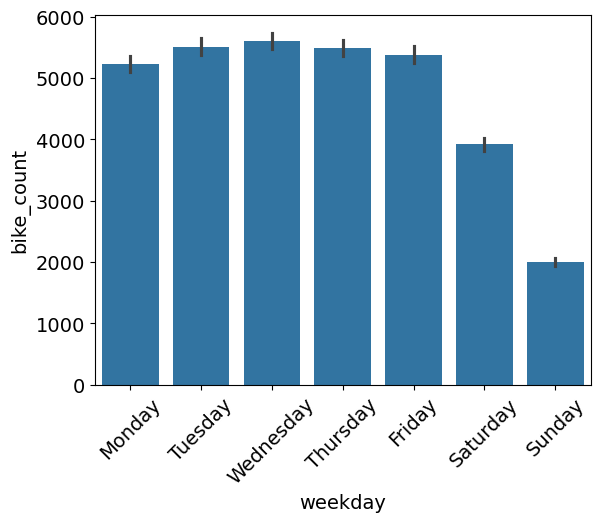

In [49]:
weekday_plot = sns.barplot(data=df, x= df['date'].dt.weekday , y = 'bike_count')

weekday_plot.set(xlabel = 'weekday')


weekday_plot.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)

plt.show()

## Looking at Correlation

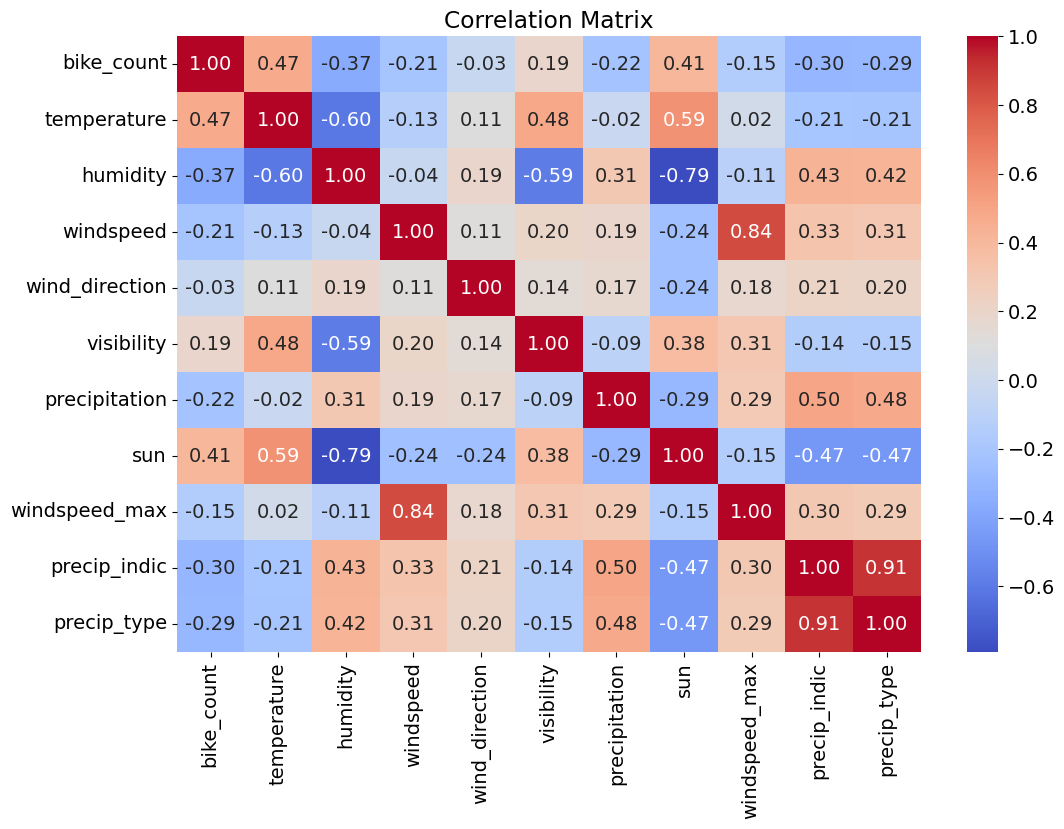

In [50]:
# Calculate the correlation matrix of the dataset
correlation_matrix = df.corr(numeric_only=True)  

plt.figure(figsize=(12, 8))
# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
